<a href="https://colab.research.google.com/github/zuhaibai123/Neural-Network/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# **SPLITING DATA**

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **VISUALIZING  DATA**

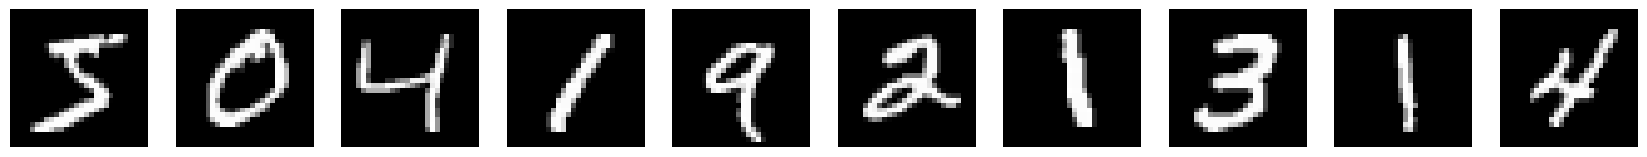

In [ ]:
n=10

plt.figure(figsize=(21,5))

for i in range(n):
  plt.subplot(2,n,i+1)
  plt.imshow(x_train[i].reshape(28,28),cmap="gray")
  plt.axis("off")

plt.show()

plt.close()


# **RESHAPING DATA**

In [ ]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# **SCALING DATA**

In [ ]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

x_train/=255
x_test/=255

# **ONE HOT ENCODDING**

In [ ]:
classes=10

y_train=to_categorical(y_train,classes)
y_test=to_categorical(y_test,classes)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


# **BUILDING CNN**

# DEFINING HYPERPARAMETERS

In [ ]:
img_row,img_col,channels=28,28,1

filtters=[6,34,64,120]

classes=10

# DEFINING THE STRUCTURE OF THE MODEL

In [ ]:
model=Sequential()

#FIRST CONVULUTIONAL LAYER
model.add(Conv2D(filtters[0],(2,2),padding="same",input_shape=(img_row,img_col,channels),activation="relu"))

#FIRST POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

#SECOND CONVULUTIONAL LAYER
model.add(Conv2D(filtters[1],(3,3),padding="same",activation="relu"))

#SECOND POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

#THIRD CONVULUTIONAL LAYER
model.add(Conv2D(filtters[2],(2,2),padding="same",activation="relu"))

#THIRD POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))

#CONVERTING THE INPUT TO 1D
model.add(Flatten())

#DENSE LAYER
model.add(Dense(64,activation="relu"))

#OUTPUT LAYER
model.add(Dense(classes,activation="softmax"))

#COMPILING THE MODEL
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="sgd")

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 34)          │           1,870 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 34)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │           8,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,246 (188.46 KB)

 Trainable params: 48,246 (188.46 KB)

 Non-trainable params: 0 (0.00 B)

# TRAINIG THE MODEL

In [ ]:
from time  import time
tic=time()

model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1)

toc=time()


print(f"time  taken : {toc-tic} ")

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4471 - loss: 1.7954
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9178 - loss: 0.2746
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9506 - loss: 0.1629
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9623 - loss: 0.1234
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9658 - loss: 0.1090
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9701 - loss: 0.0923
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9741 - loss: 0.0827
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9759 - loss: 0.0770
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9785 - loss: 0.0670
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9784 - loss: 0.0669
time  taken : 37.61456513404846 


## **TESTING THE MODEL**

In [ ]:
y_pred_prob=model.predict(x_test)
y_pred=np.where(y_pred_prob>0.5,1,0)

from sklearn.metrics import accuracy_score

accuracy=round(accuracy_score(y_pred,y_test)*100,2)

print(accuracy,"%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
98.36 %


# TESTING ON A SAMPLE

In [ ]:
x_sample=x_test[100:120]
y_sample=y_test[100:120]

y_pred_prob=model.predict(x_sample)
y_pred=np.where(y_pred_prob>0.5,1,0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


# VISUALIZING THE PREDICTIONS

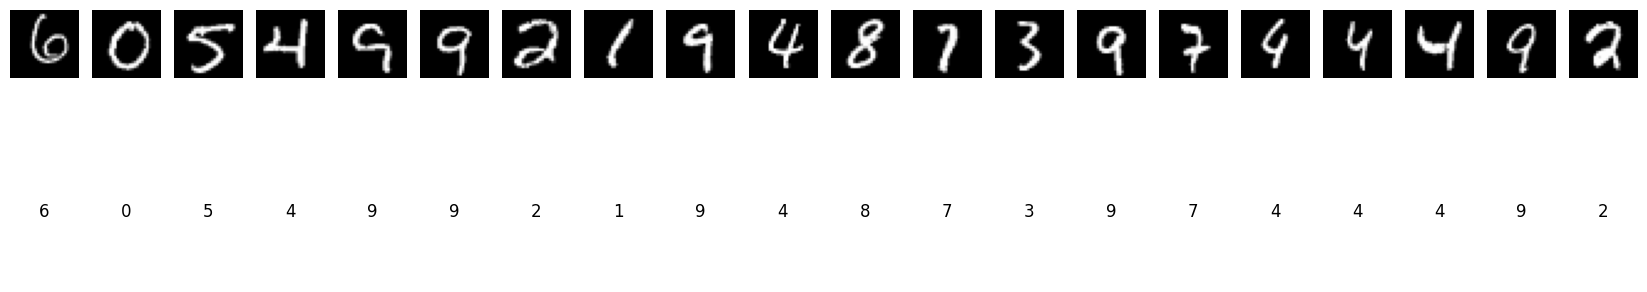

In [ ]:
n=len(x_sample)

plt.figure(figsize=(21,4))

for i in range (n):
  plt.subplot(2,n, i+1)
  plt.imshow(x_sample[i].reshape(28,28),cmap="gray")
  plt.axis("off")

  pred_values=np.argmax(y_pred[i])
  plt.subplot(2,n ,i+1+n)
  plt.text(0.5,0.5,str(pred_values),fontsize=12,ha="center", va="center")
  plt.axis("off")

plt.show()
plt.close()